In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

In [33]:
img[10,10,:] = [255,255,255]

In [35]:
img.shape #이미지 크기

(900, 1200, 3)

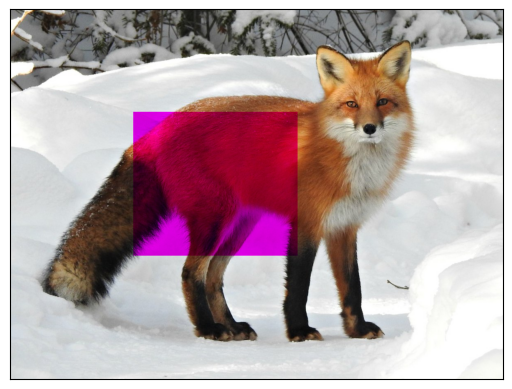

In [42]:
img = cv2.imread('fox.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img[250:600, 300:700, 1]=0


plt.imshow(img)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()


In [3]:
#mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),30,(random.randrange(0,255),random.randrange(0,255),random.randrange(0,255)),3)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, 'mouse-('+str(x)+','+str(y)+')', (10,40), font, 1, (255,255,255), 2, cv2.LINE_AA)


# Create a black image, a window and bind the function to window

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27: #esc로 종료
        break
cv2.destroyAllWindows()

In [10]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('value','image',0,255,nothing)


while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break



drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True: cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else: cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break



cv2.destroyAllWindows()


In [47]:
img1 = cv2.imread('ml.jpg')
img2 = cv2.imread('OpenCV_logo.png')
alpha = 0.9

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

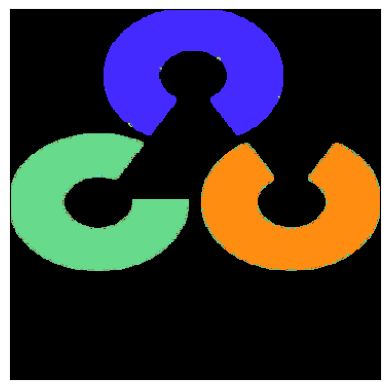

In [52]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.imshow(img2)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()
